In [1]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import os
import csv
import pandas as pd
import numpy as np
from numpy import fft
from scipy.fftpack import fft
from scipy.fft import fft, fftfreq
import matplotlib
from  matplotlib import pyplot as plt
# import librosa
from ipywidgets import interact, fixed, FloatSlider
import IPython.display as ipd
from sklearn import preprocessing
%matplotlib inline


In [2]:
with open('0803_kc_nano_result_1.csv','rt') as csvfile:
    rows = csv.reader(csvfile)
    df=pd.read_csv(r'./0803_kc_nano_result_1.csv')
    data_arr = []
    data_arrx = []
    data_arry = []
    for row in rows:
        data_arr.append(row)
    for i in range(0,len(df)+1):
        data_arrx.append(float(data_arr[i][0]))
        data_arry.append(float(data_arr[i][3]))
    print(len(data_arry))

12757


12757
12757


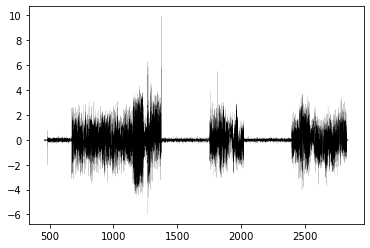

In [3]:
fig = plt.figure()
ax = plt.axes()
x = np.array(data_arrx)
y = np.array(data_arry)
y = preprocessing.scale(y)
print(len(x))
print(len(y))
plt.xticks(np.arange(0, len(x)+1, 500))
ax.plot(x,y,color = 'k', linewidth=0.1)


/var/folders/2m/2yp8xh891bd67xxdsy56_6gc0000gn/T/ipykernel_38682/191499225.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 2))


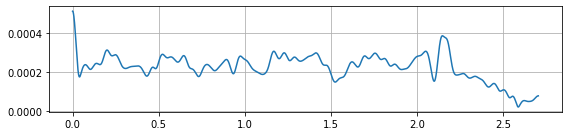

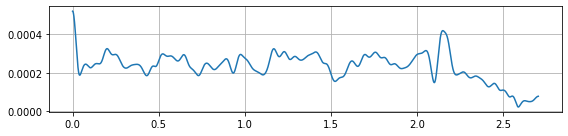

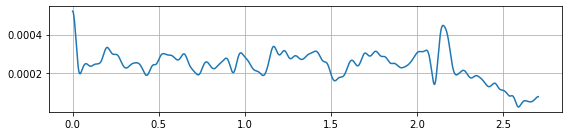

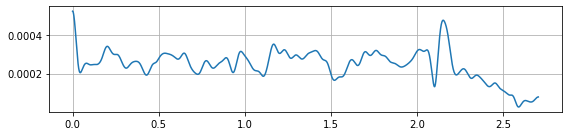

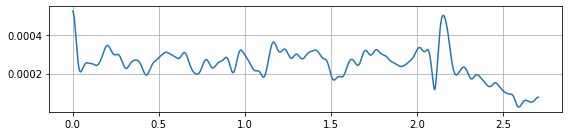

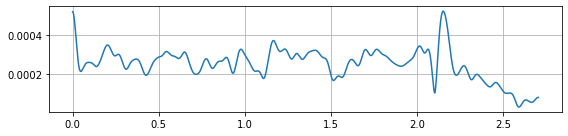

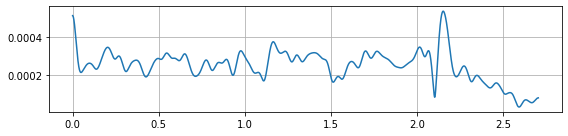

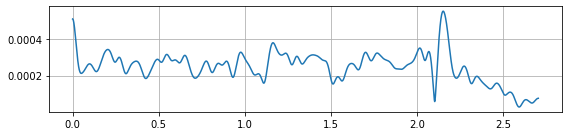

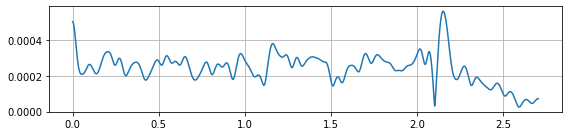

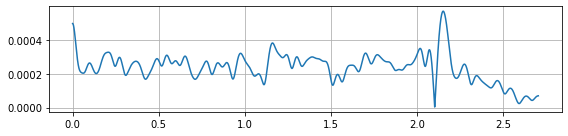

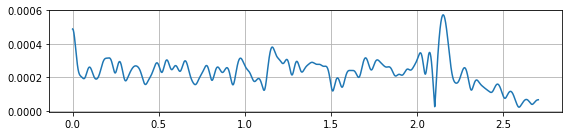

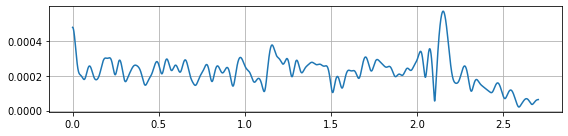

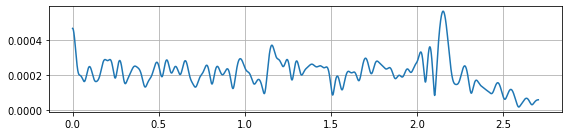

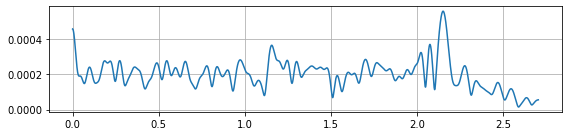

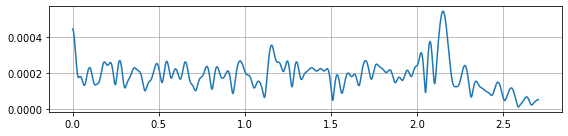

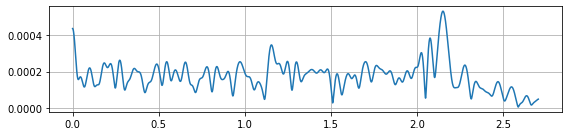

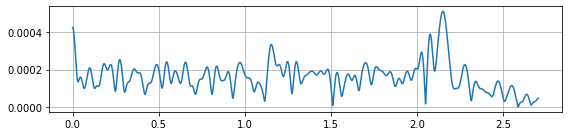

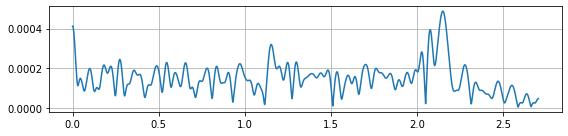

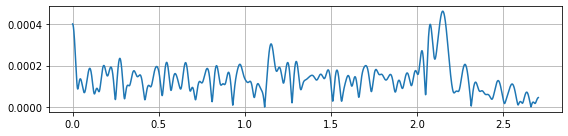

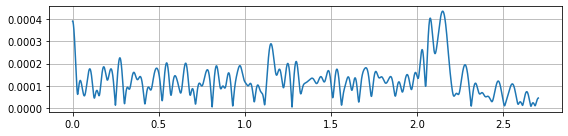

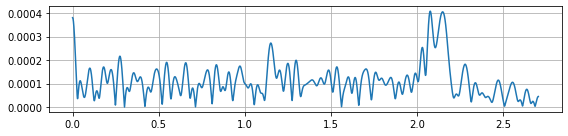

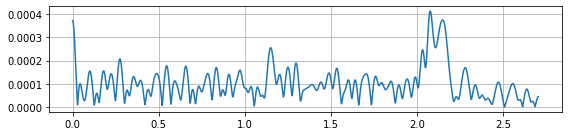

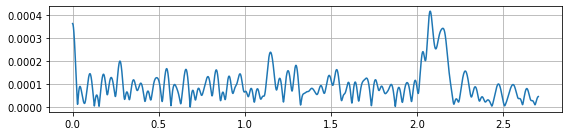

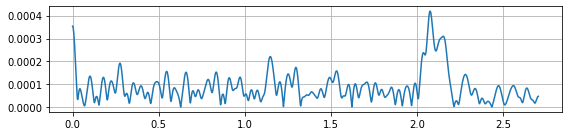

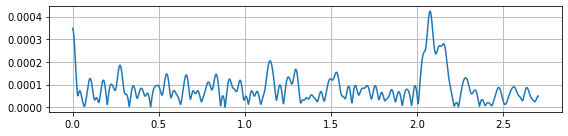

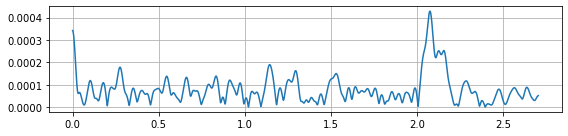

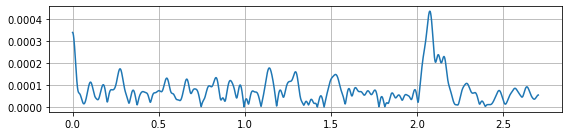

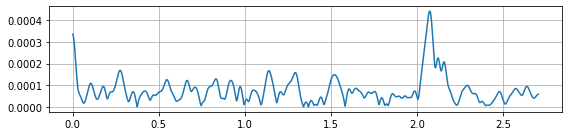

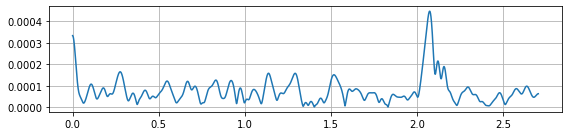

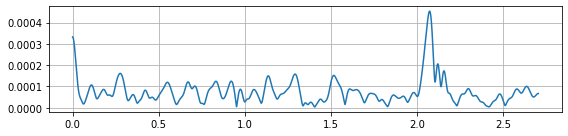

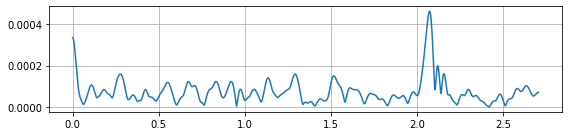

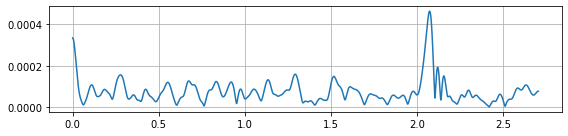

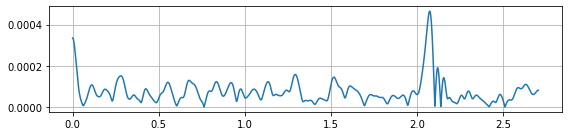

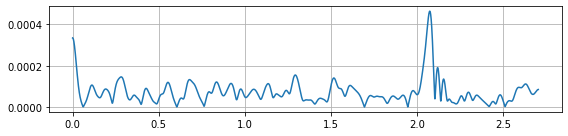

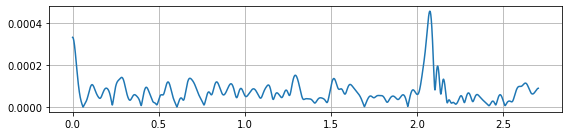

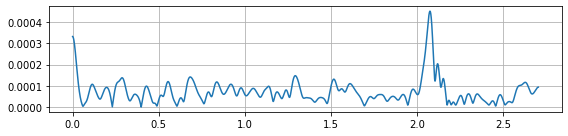

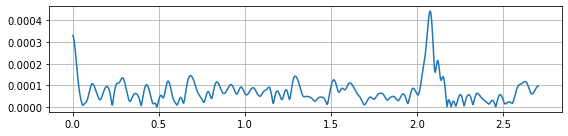

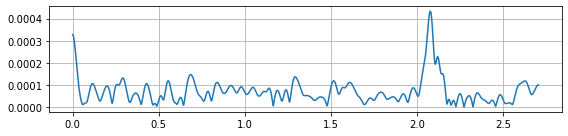

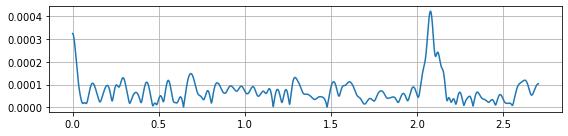

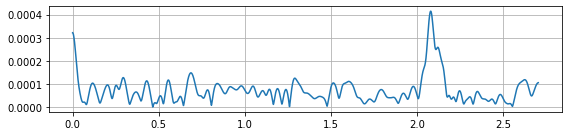

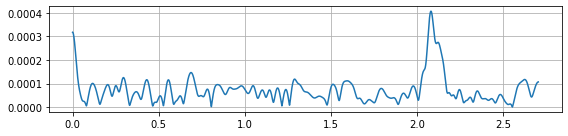

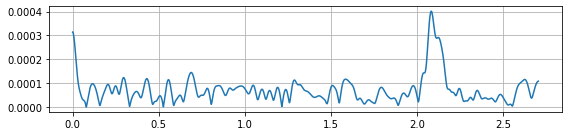

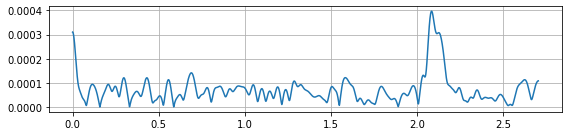

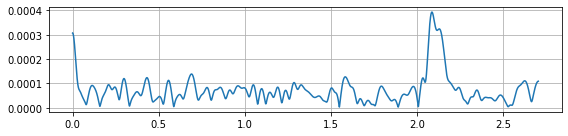

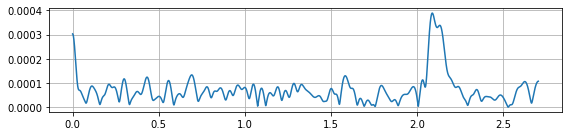

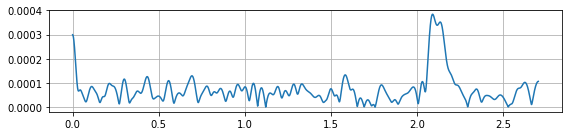

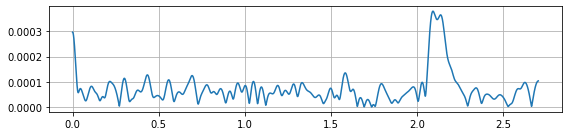

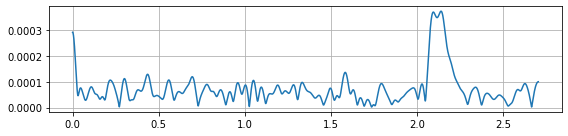

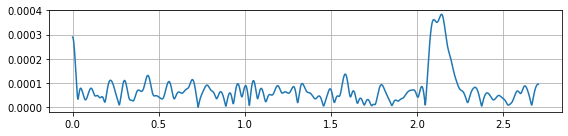

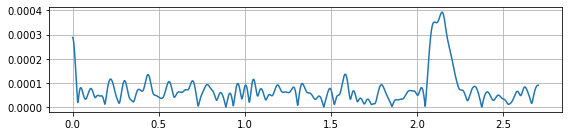

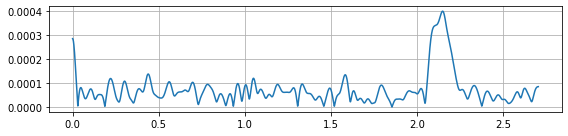

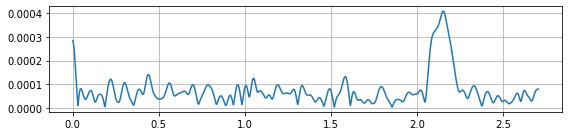

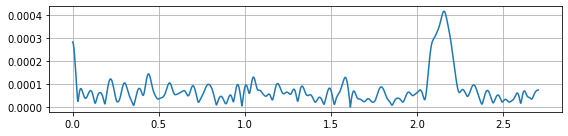

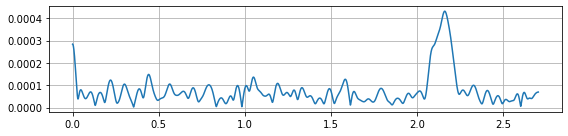

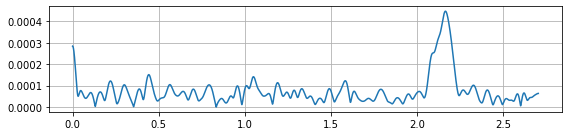

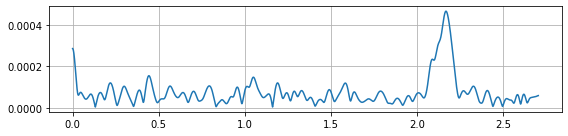

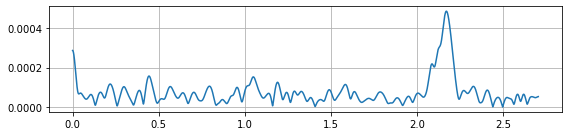

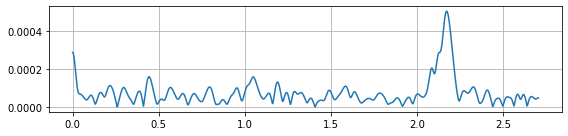

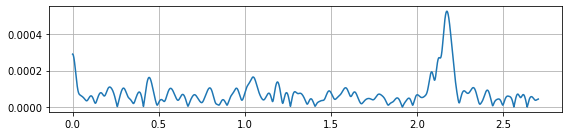

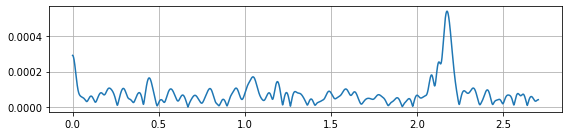

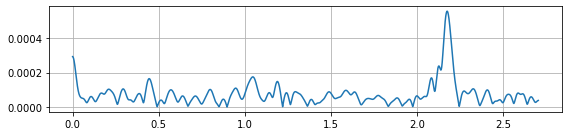

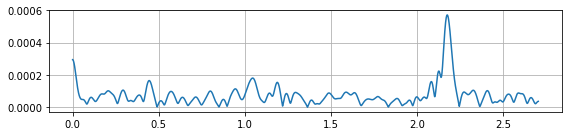

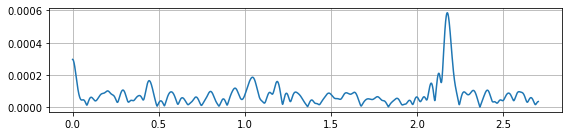

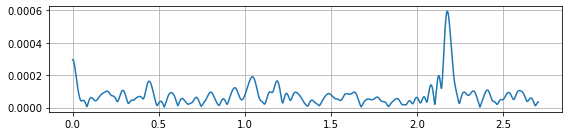

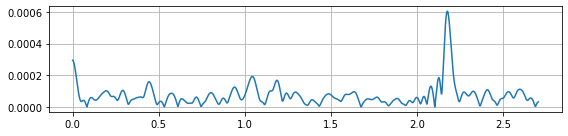

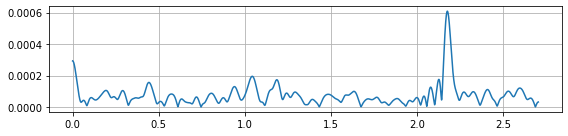

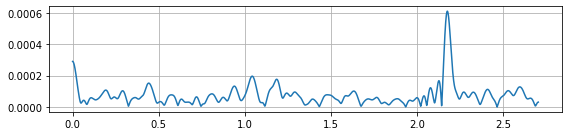

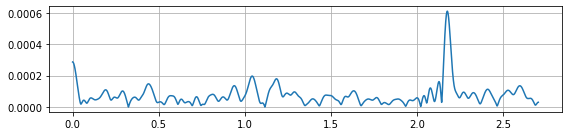

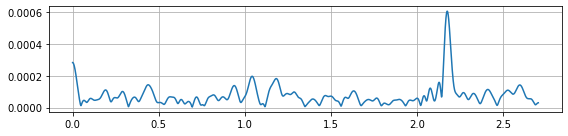

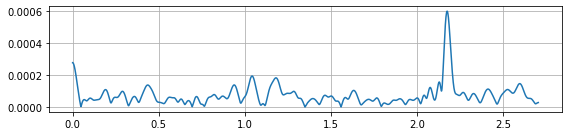

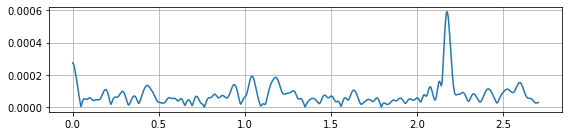

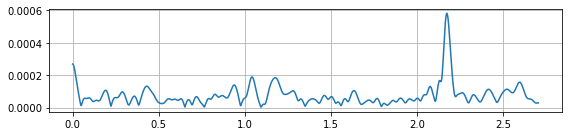

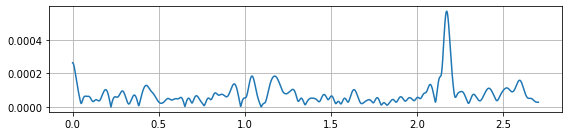

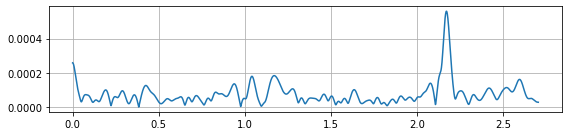

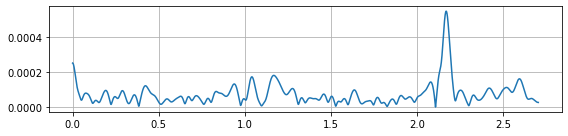

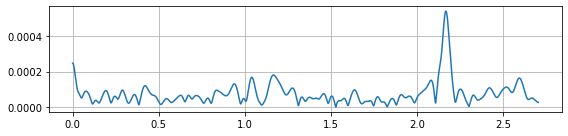

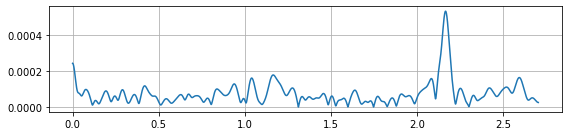

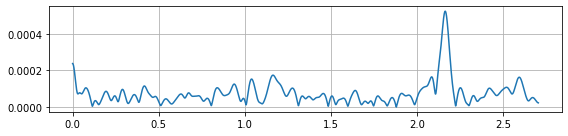

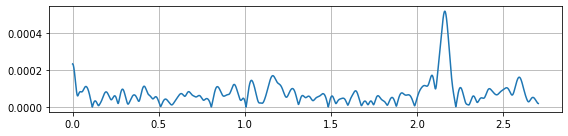

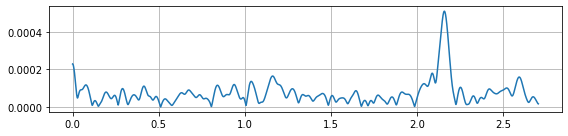

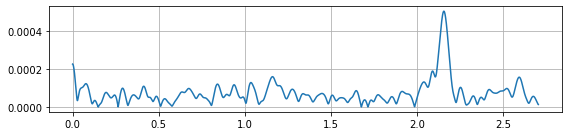

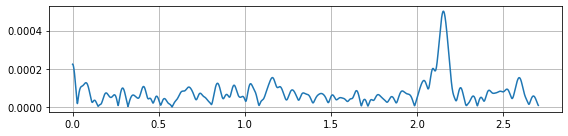

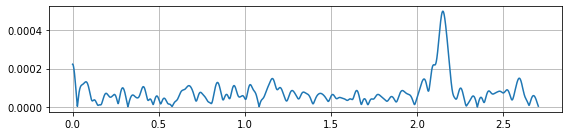

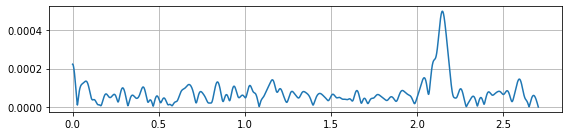

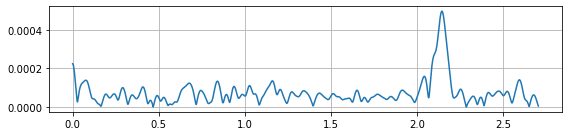

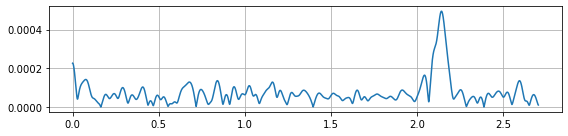

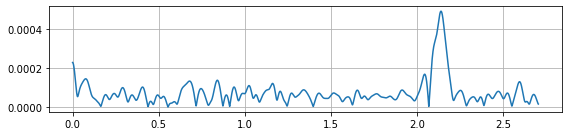

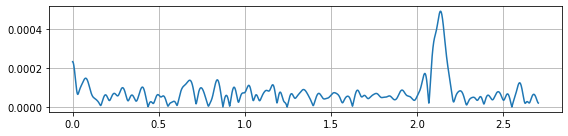

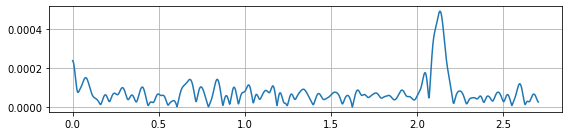

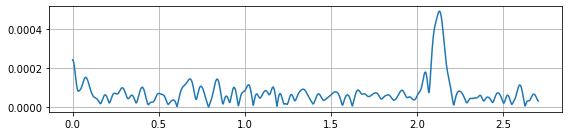

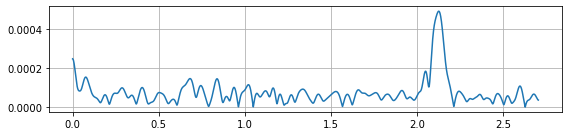

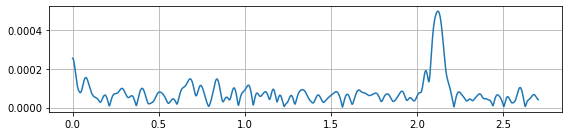

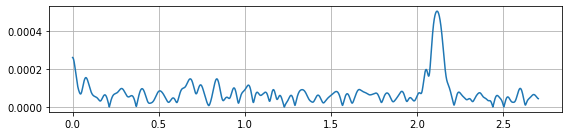

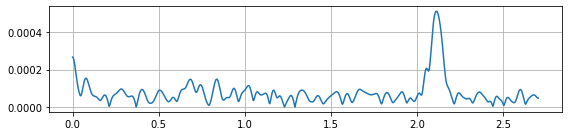

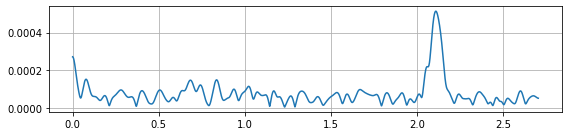

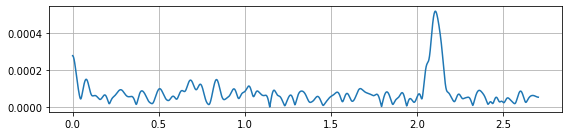

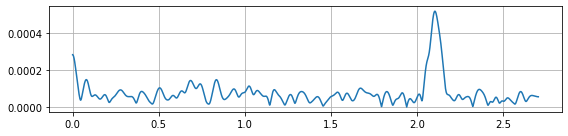

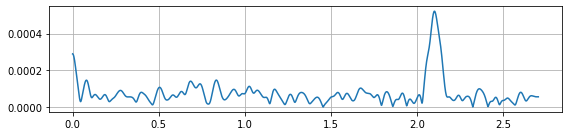

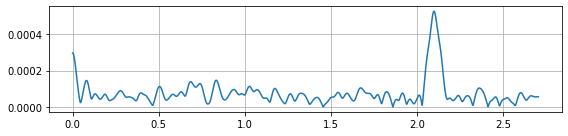

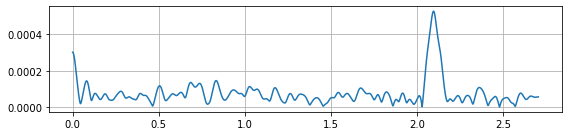

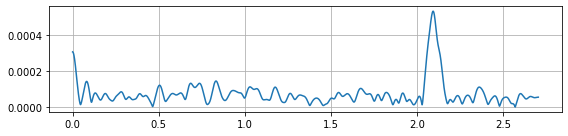

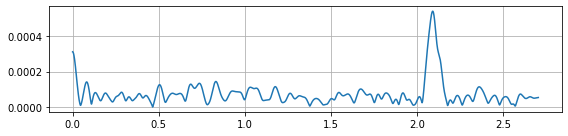

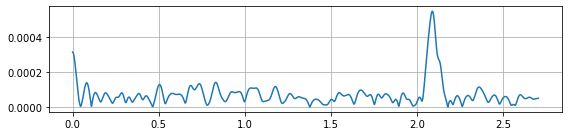

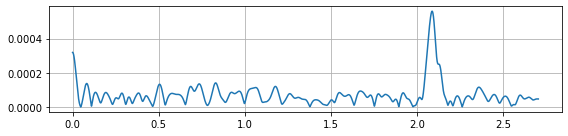

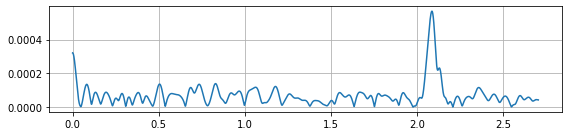

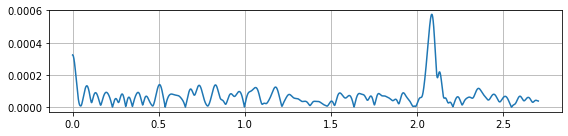

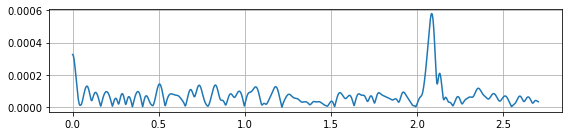

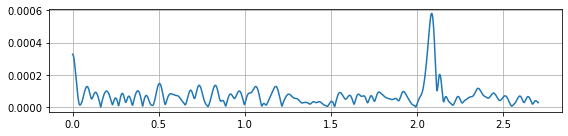

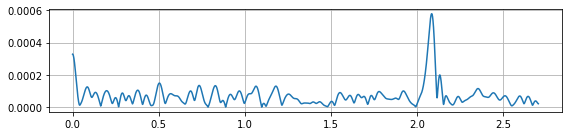

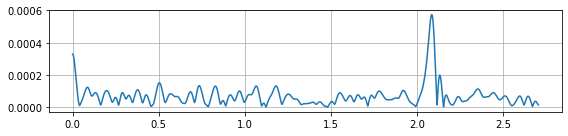

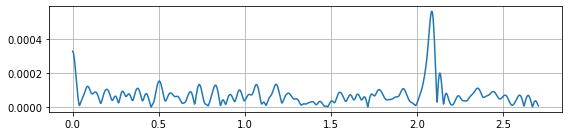

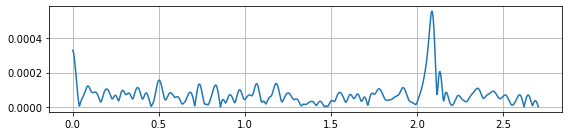

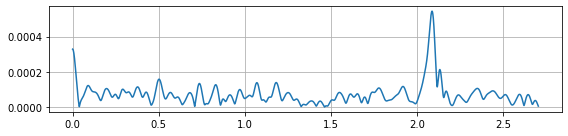

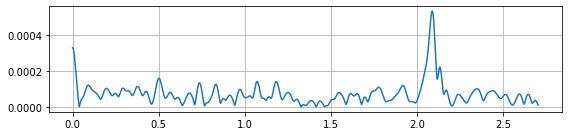

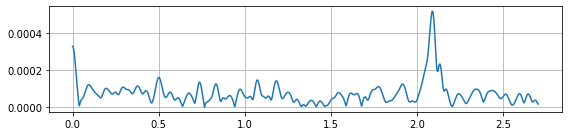

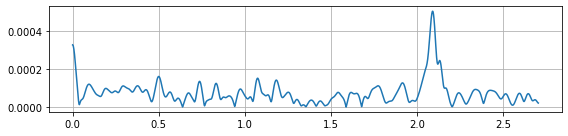

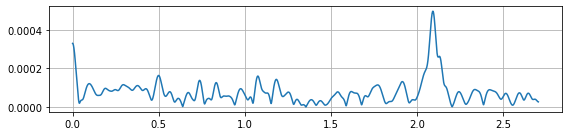

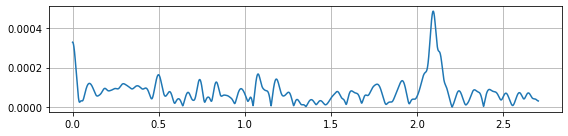

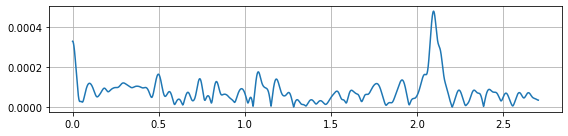

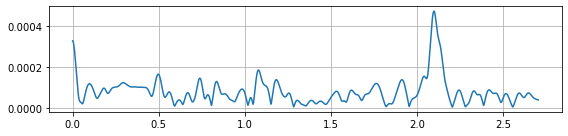

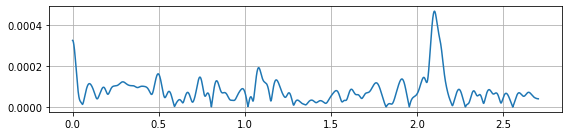

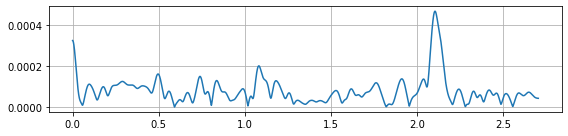

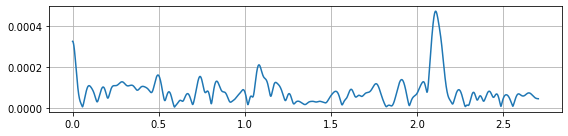

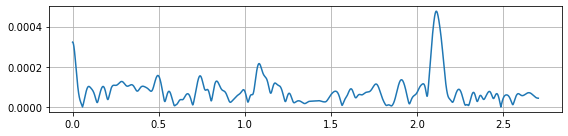

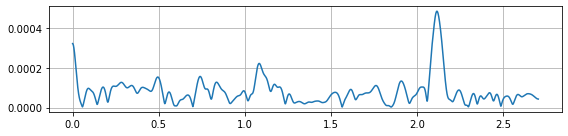

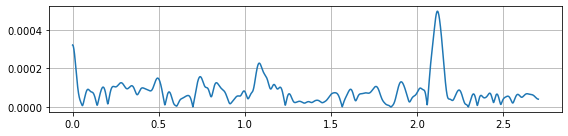

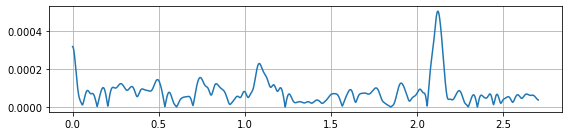

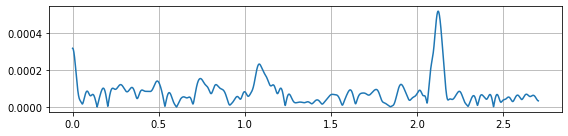

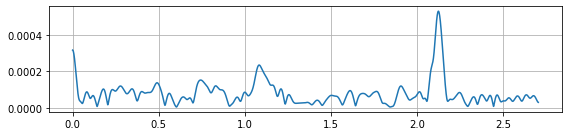

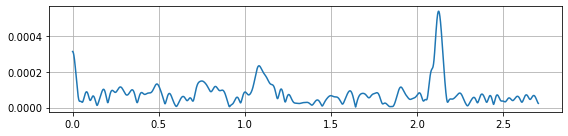

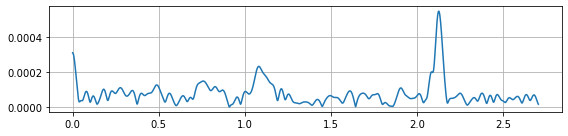

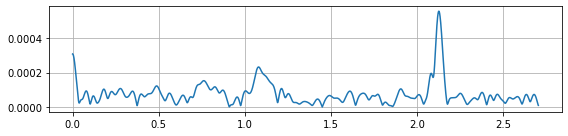

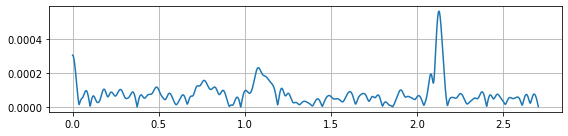

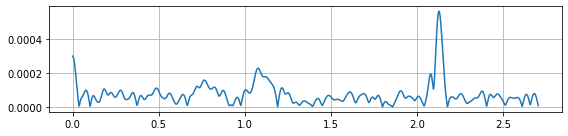

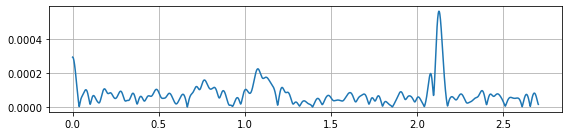

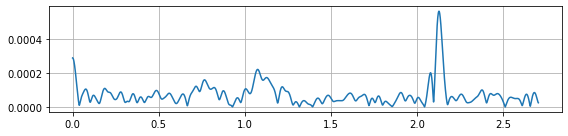

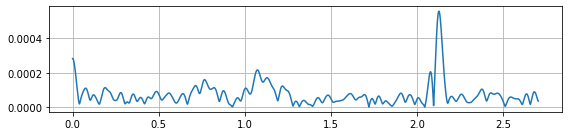

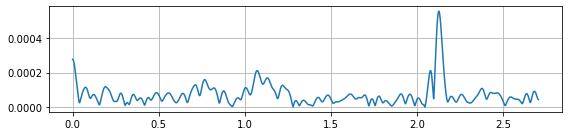

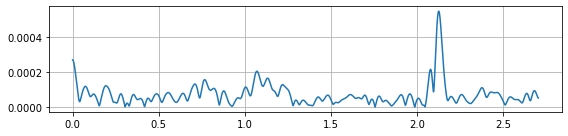

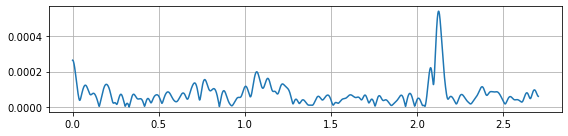

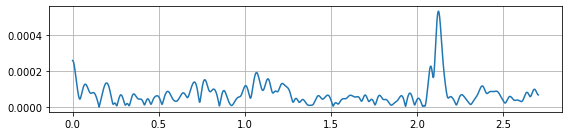

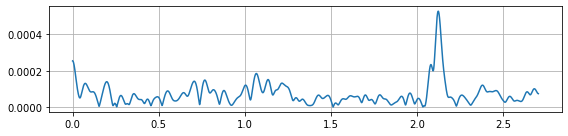

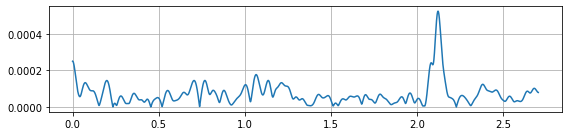

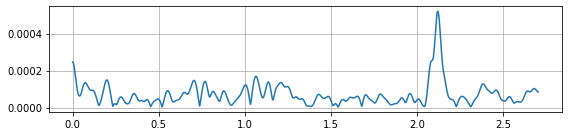

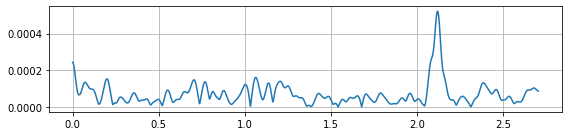

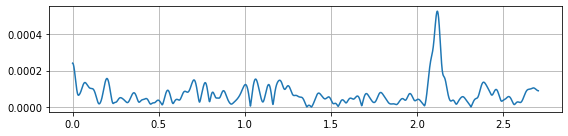

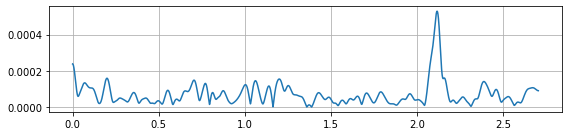

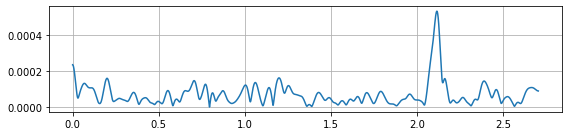

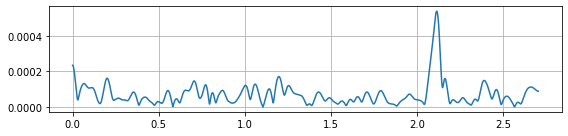

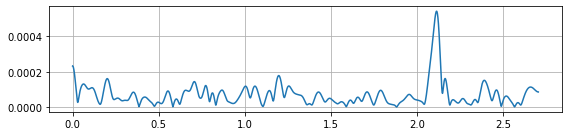

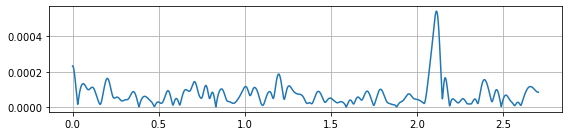

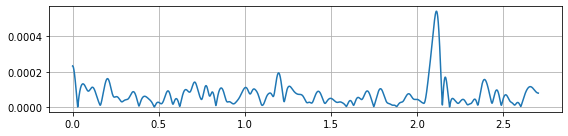

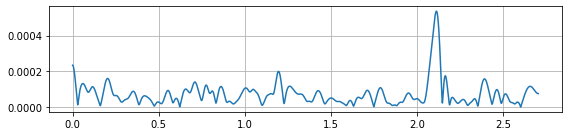

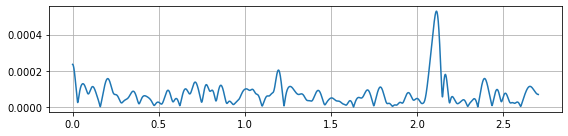

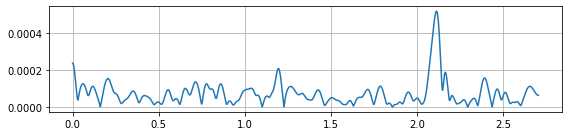

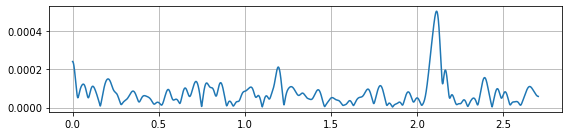

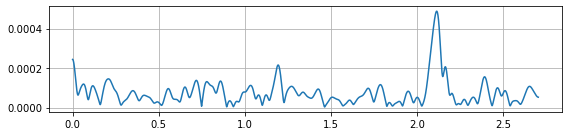

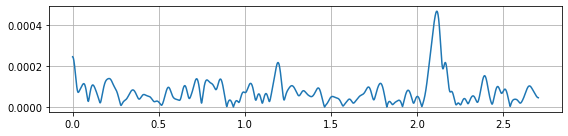

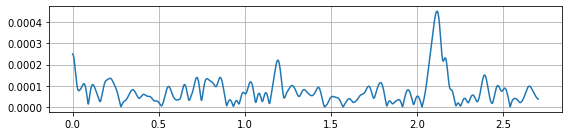

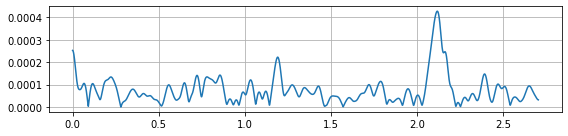

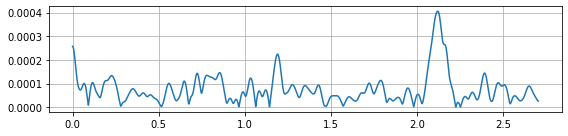

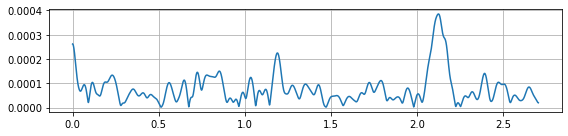

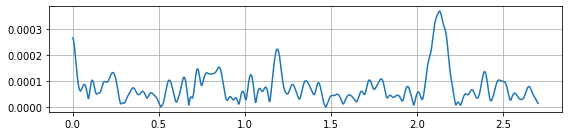

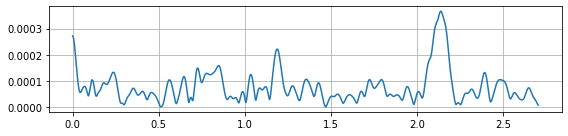

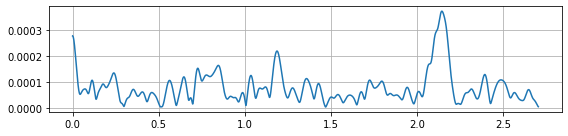

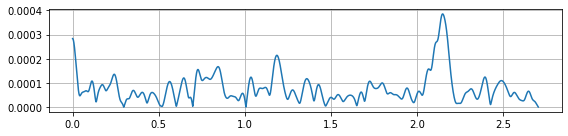

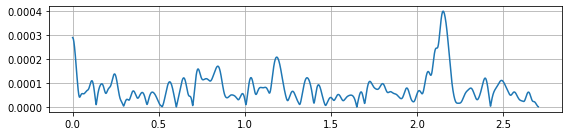

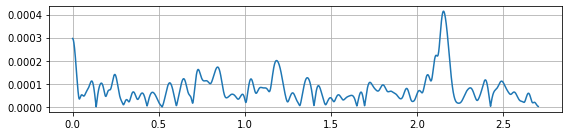

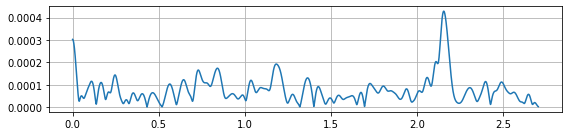

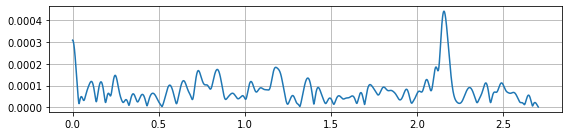

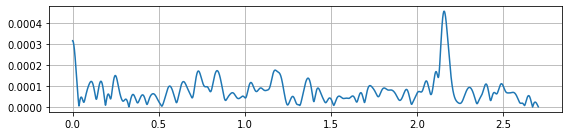

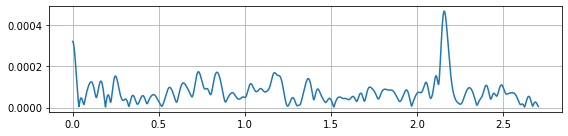

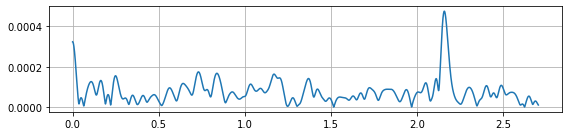

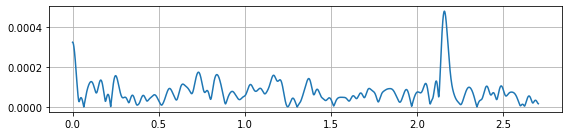

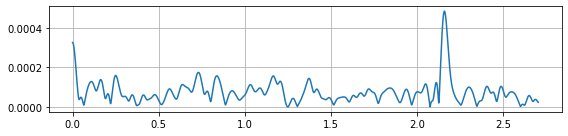

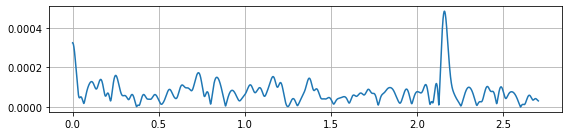

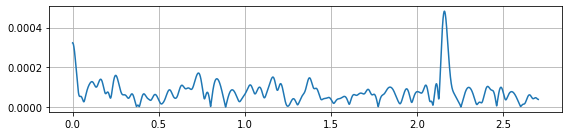

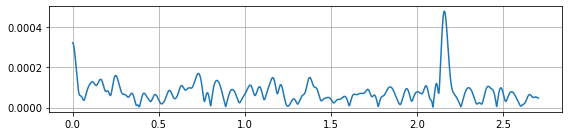

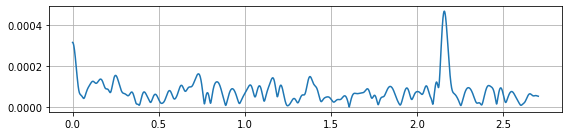

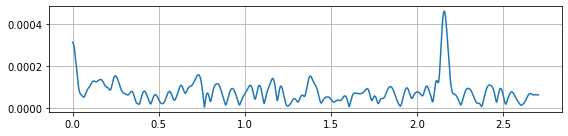

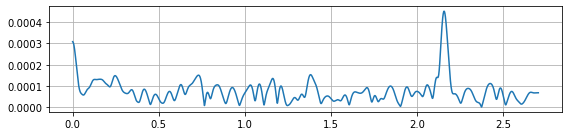

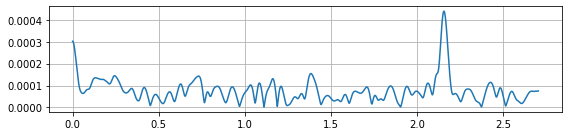

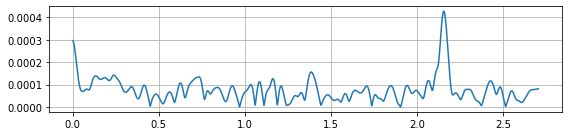

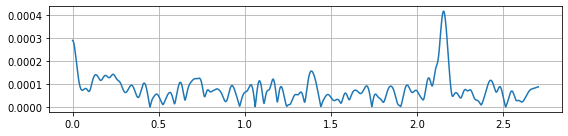

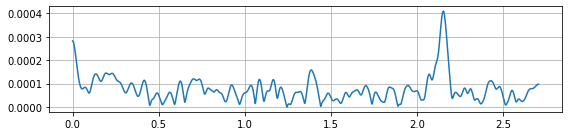

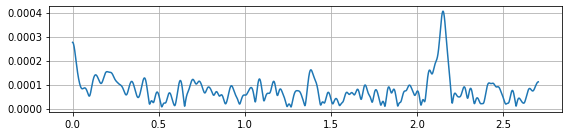

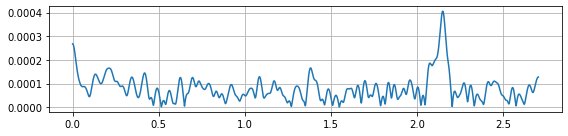

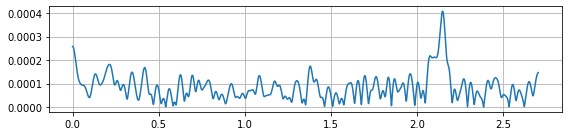

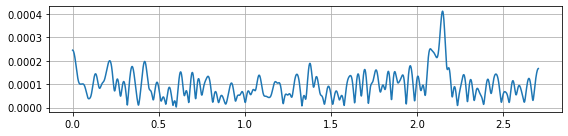

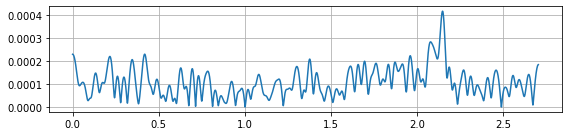

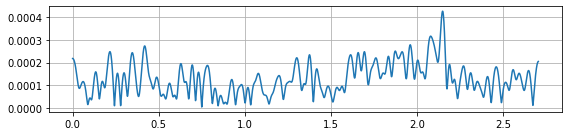

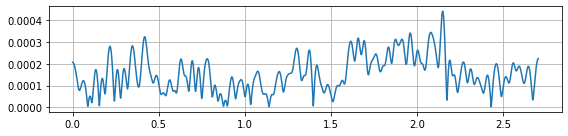

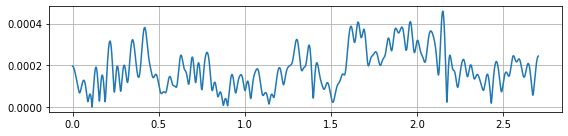

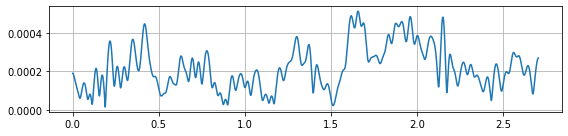

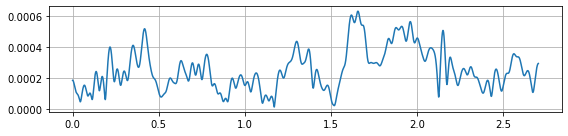

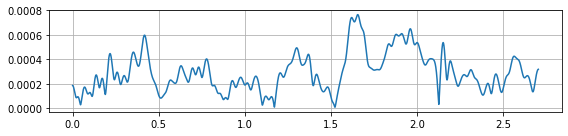

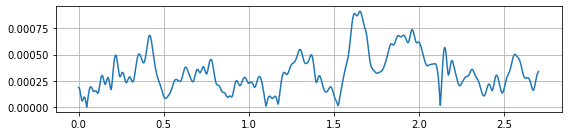

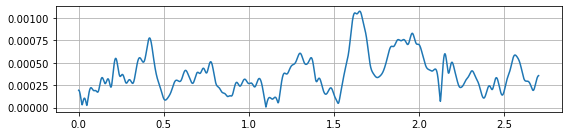

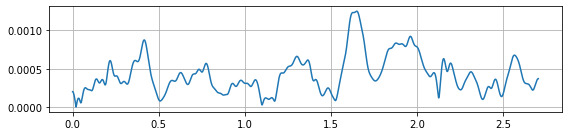

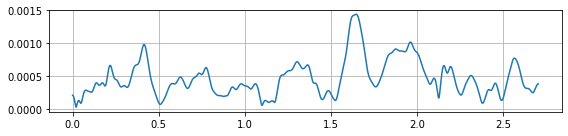

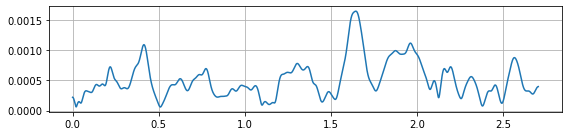

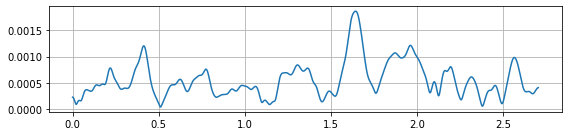

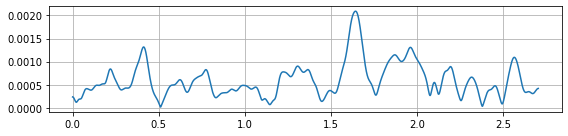

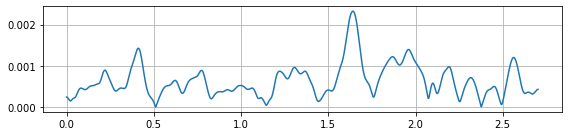

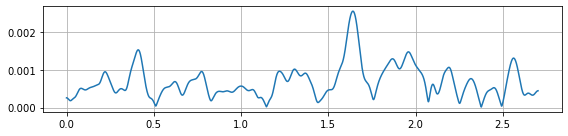

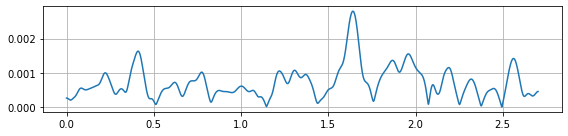

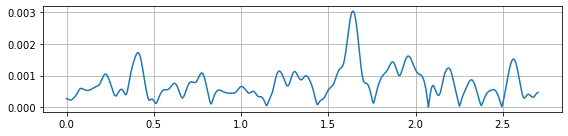

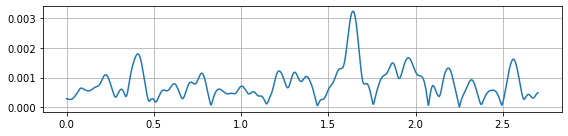

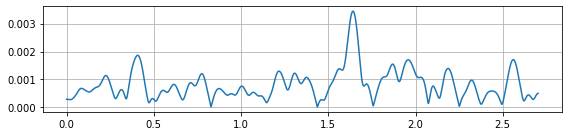

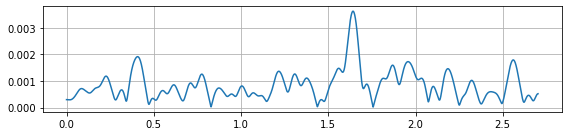

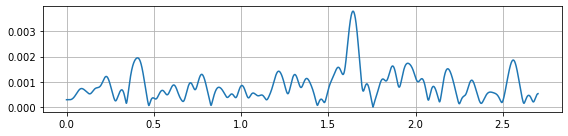

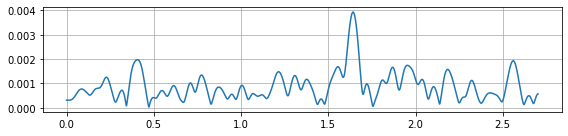

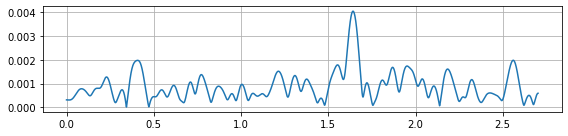

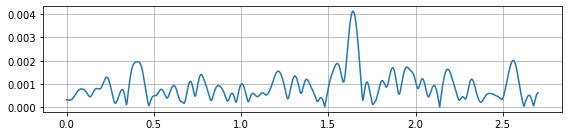

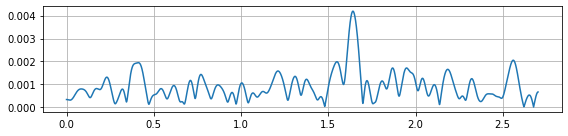

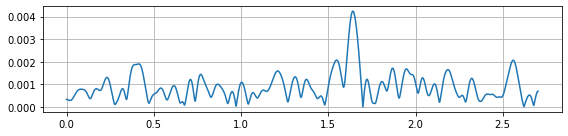

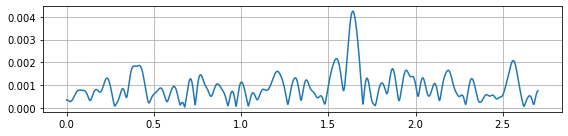

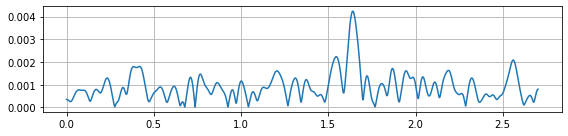

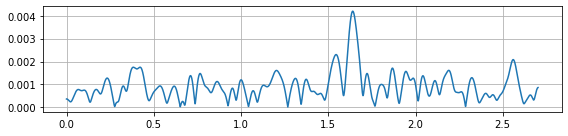

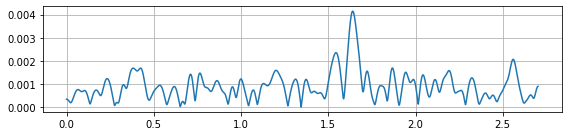

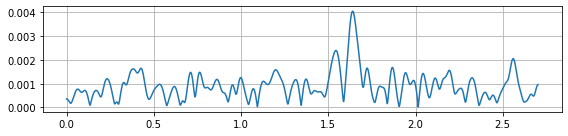

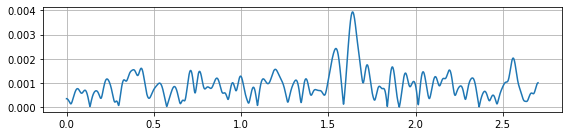

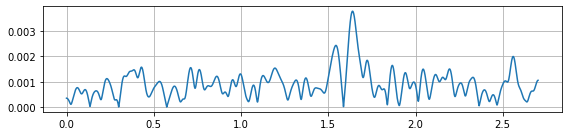

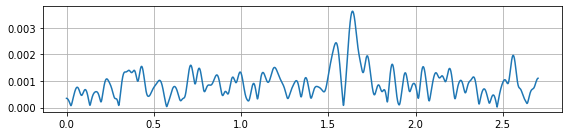

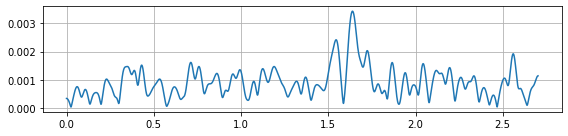

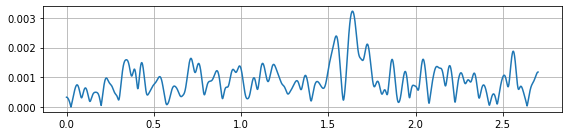

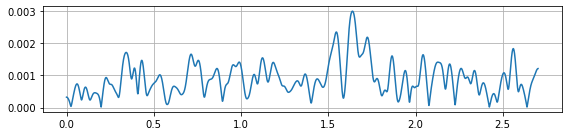

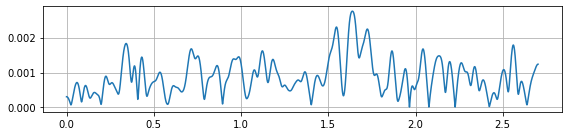

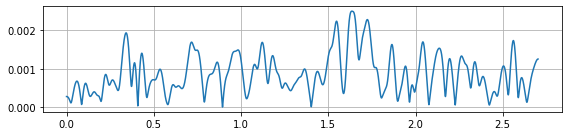

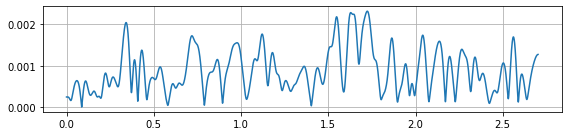

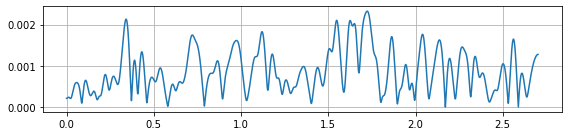

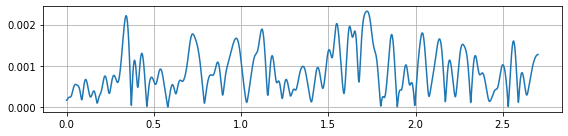

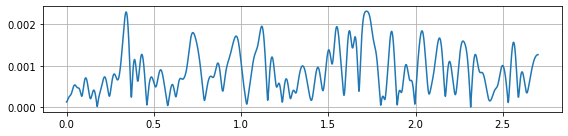

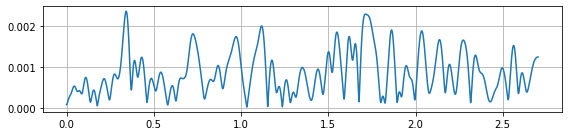

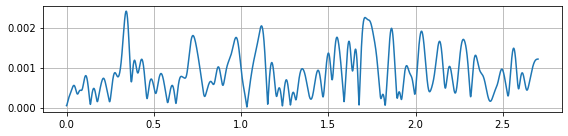

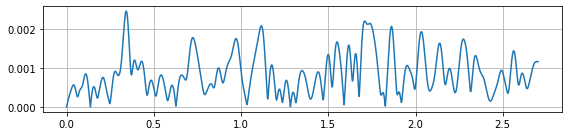

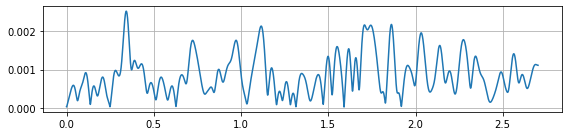

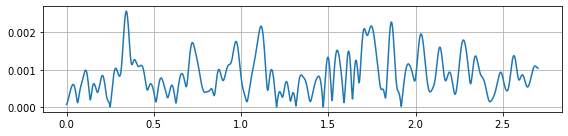

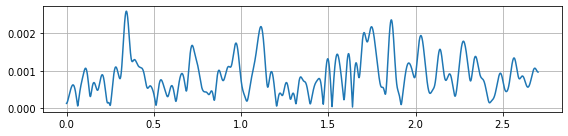

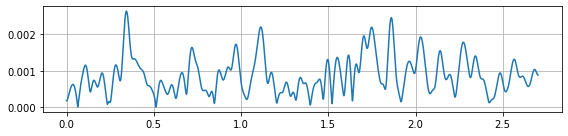

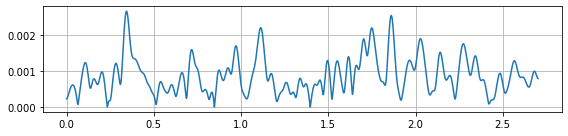

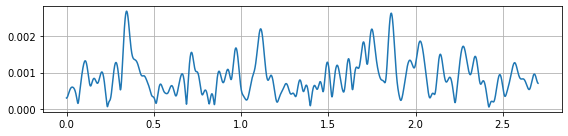

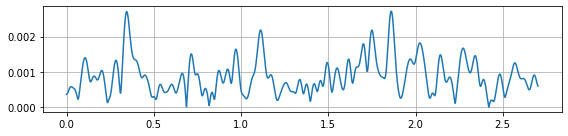

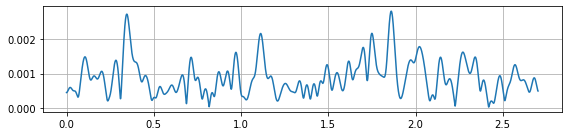

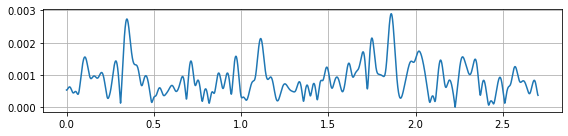

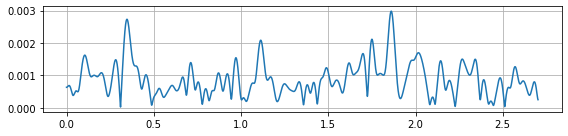

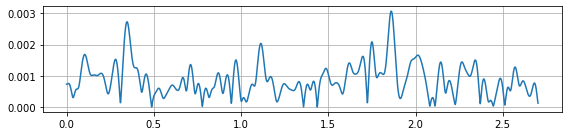

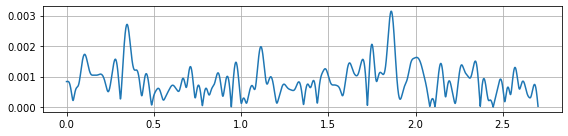

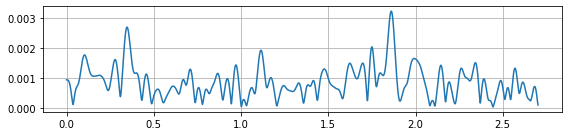

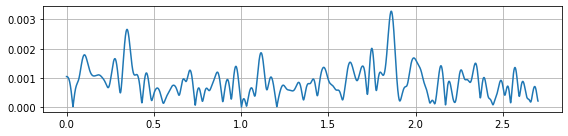

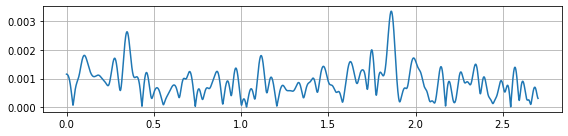

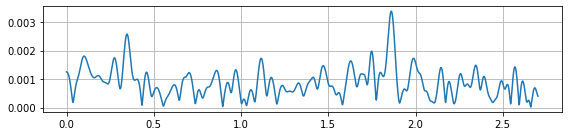

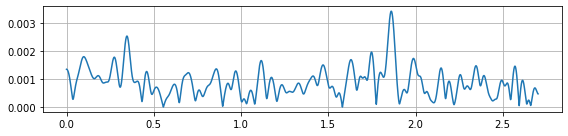

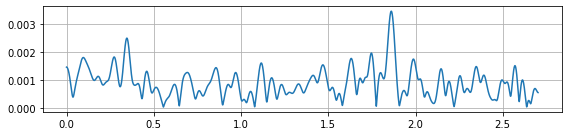

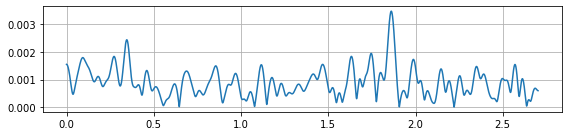

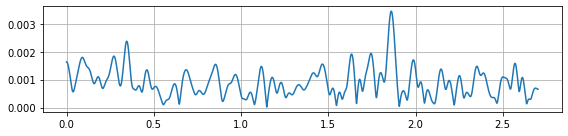

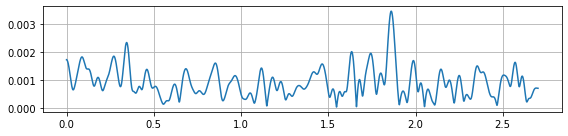

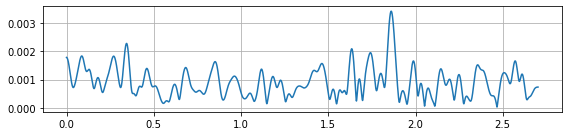

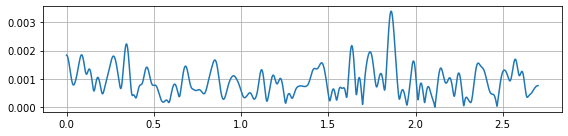

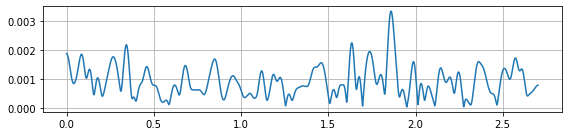

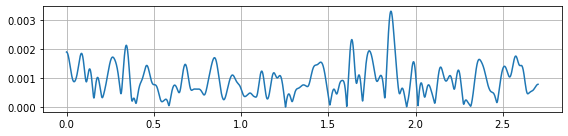

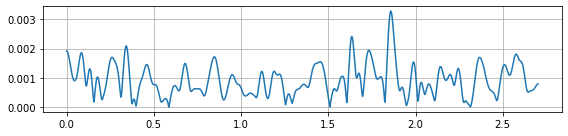

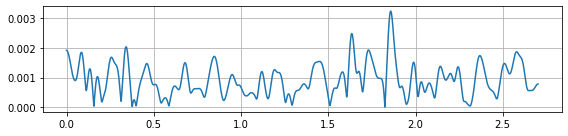

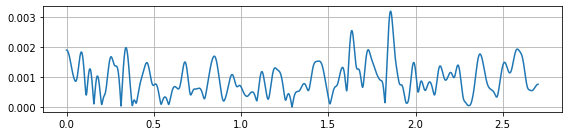

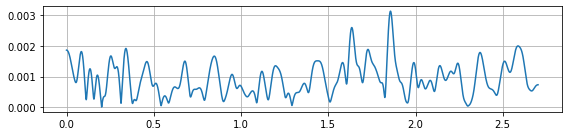

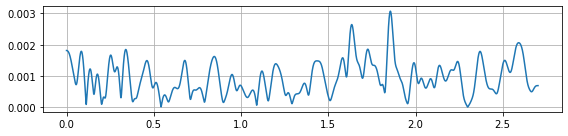

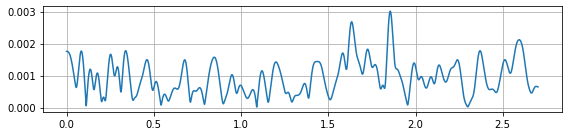

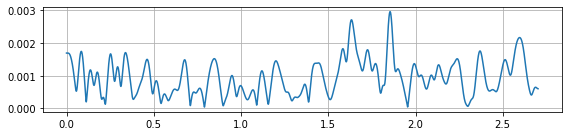

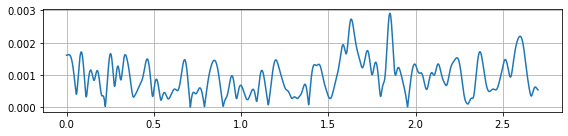

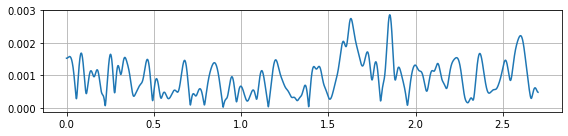

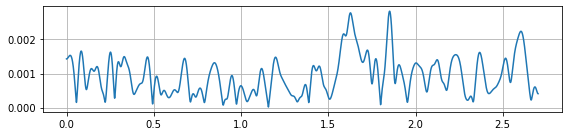

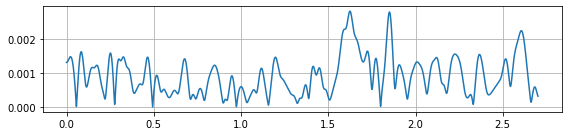

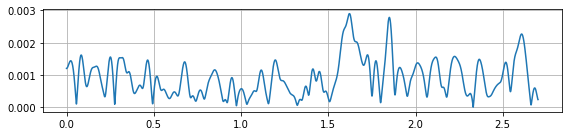

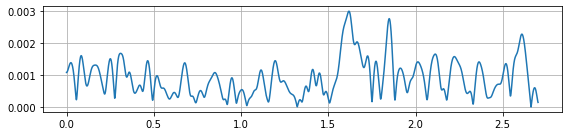

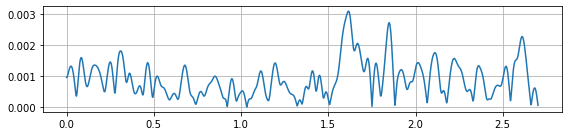

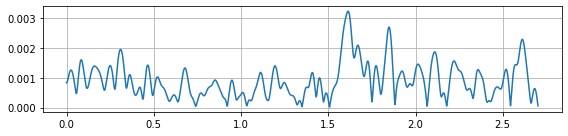

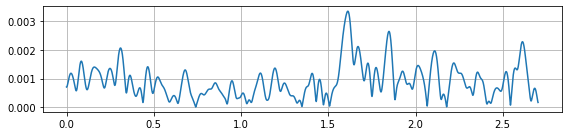

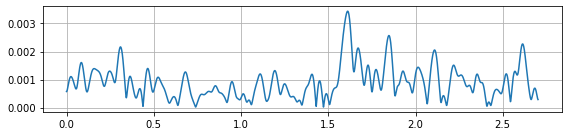

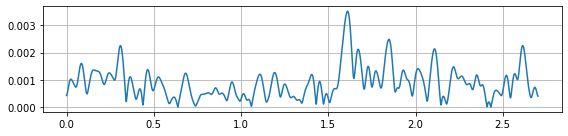

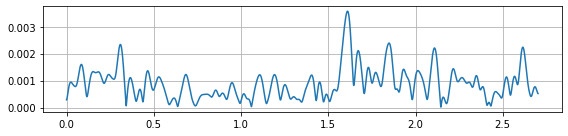

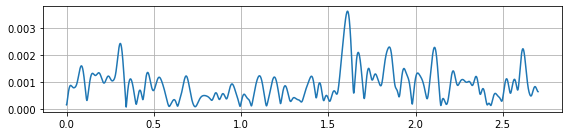

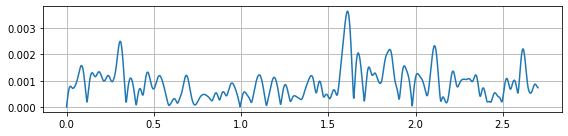

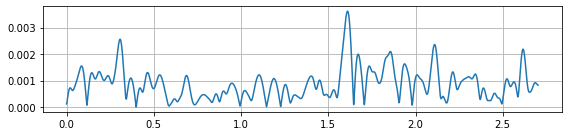

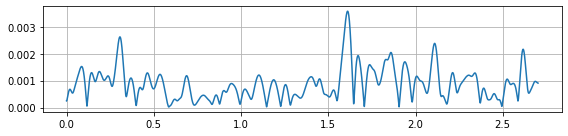

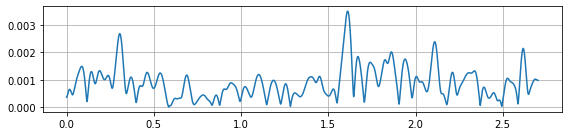

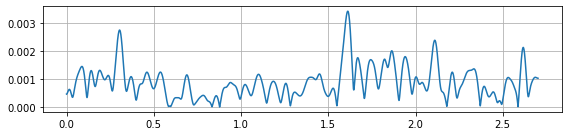

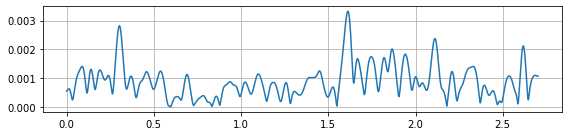

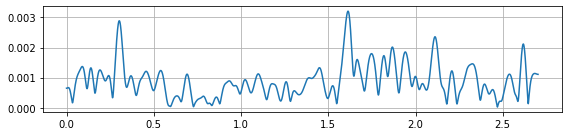

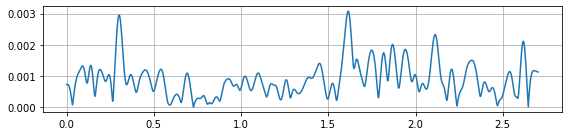

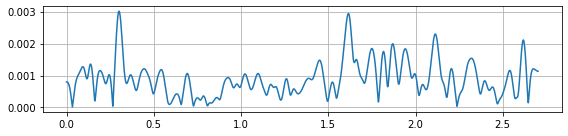

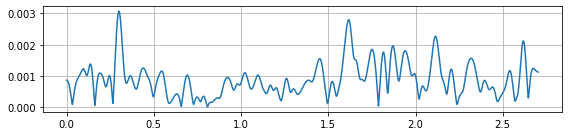

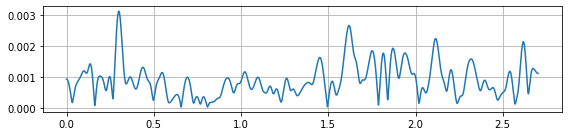

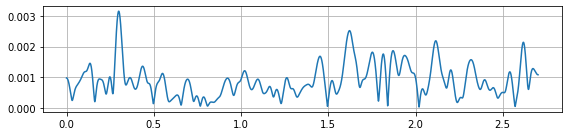

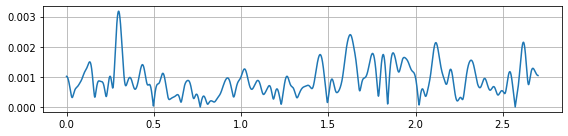

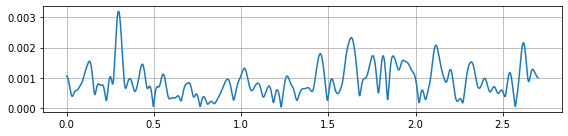

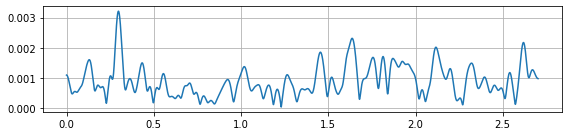

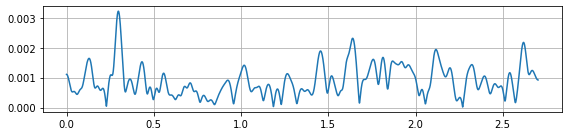

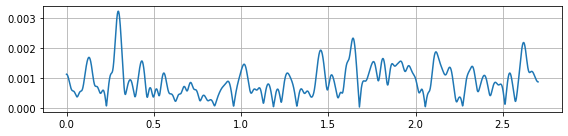

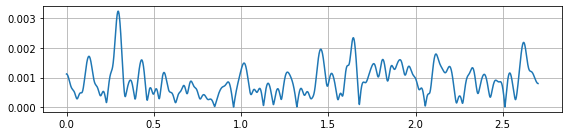

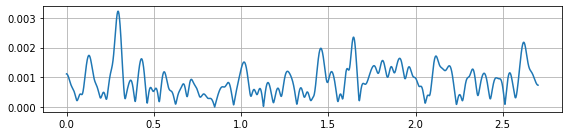

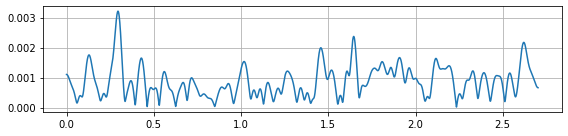

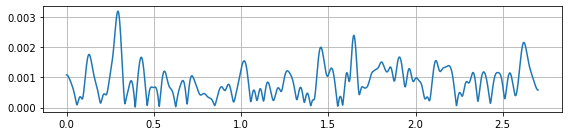

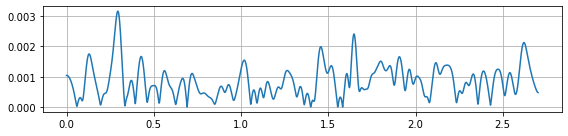

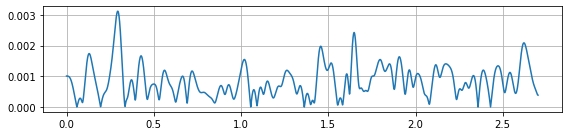

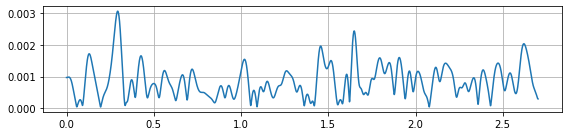

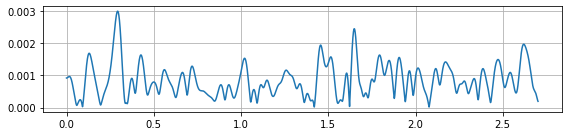

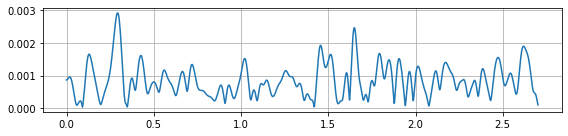

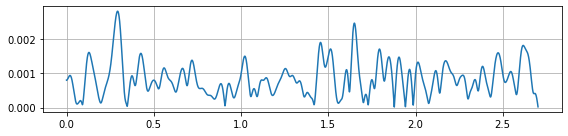

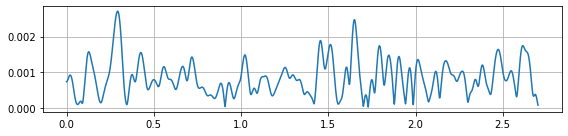

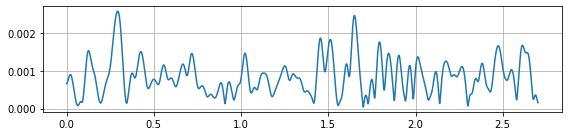

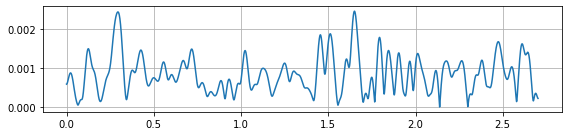

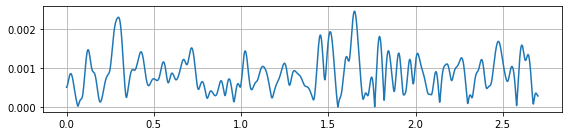

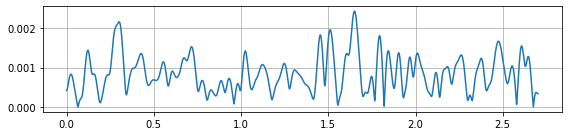

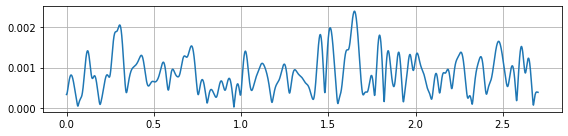

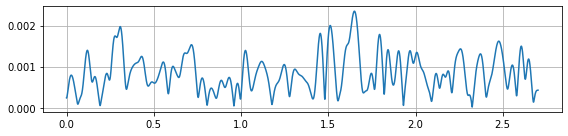

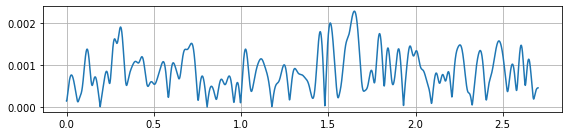

Error in callback <function flush_figures at 0x7f7b0ffe5820> (for post_execute):


KeyboardInterrupt: 

In [30]:
#128 datas  = 23.68sec
data_128 = np.array([])
copy = np.array([])
freq = []
T = 0.185
N = len(x)
zeros = np.zeros(10000)
twos = np.full(400,0.08)
half_c =(np.hanning(250))
# plt.plot(half_c)
for i in range(0,len(data_arry)):
    if data_128.size<250:
        data_128 = np.append(data_128,y[i])
        copy = np.append(copy,y[i])
    else:
        data_128 = np.delete(data_128,0)
        data_128 = np.append(data_128,y[i])
         
        copy = np.delete(copy,0)
        copy = np.append(copy,y[i])
    if len(data_128)==250 and i!=0 and i%5==0:
        plt.figure(figsize=(8, 2))
        data_128 = np.copy(copy)
#         data_128 = np.add(data_128,twos)
        data_128 = np.multiply(data_128,half_c)
        data_128 = np.append(data_128,zeros)
        
        yf = 1/data_128.size * np.abs(fft(data_128)[0:data_128.size//2])
        xf =(fftfreq(data_128.size,T)[:data_128.size//2])
        index = np.where(yf == max(yf[:]))
#         print(index)
#         print(xf[index[0][0]])
#         print(yf[index[0][0]])
        data_128 = np.delete(data_128,np.s_[250:10000+250])
        plt.plot(xf,yf)
        plt.xlabel('Frequency (Hz)')
        plt.title("0805_result_1_z : window 250")
#         plt.plot(data_128)
        plt.grid()
        plt.tight_layout()
# X = np.linspace(0,N*T,len(freq))
# Y = np.array(freq)
# plt.plot(X,Y,c='k',linewidth=0.2)
# # plt.ylim([0,5])
# plt.xlabel('Time()milliseconds)')
# plt.ylabel('Frequency (Hz)')
# plt.title("0805_result_3_z")

Text(0.5, 1.0, '0805_result_1_z : window 250 ')

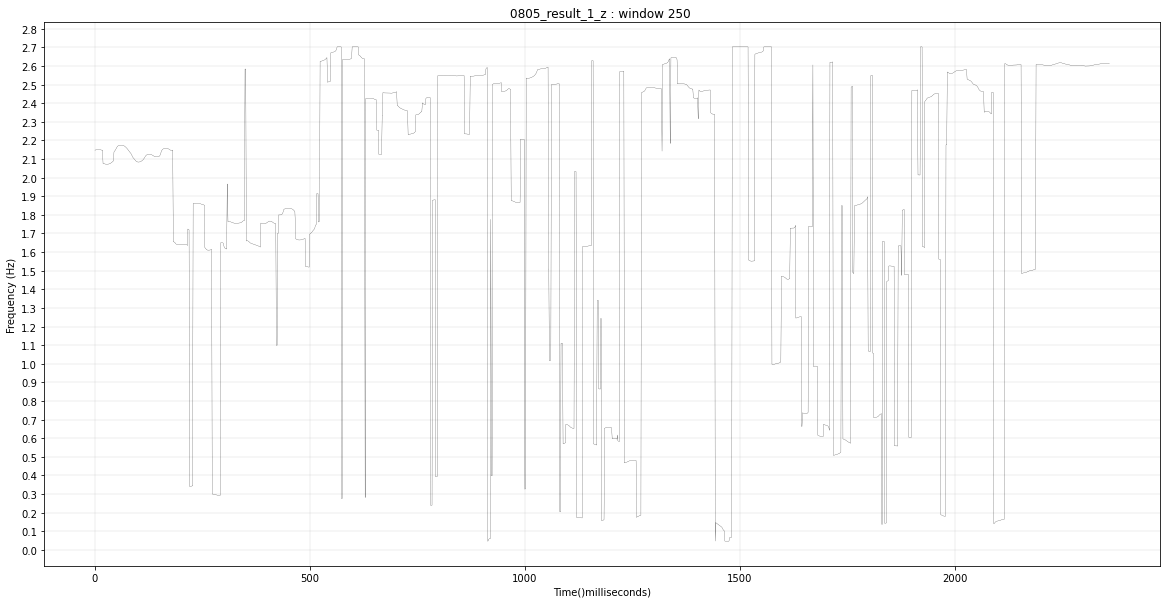

In [33]:
#128 datas  = 23.68sec
data_128 = np.array([])
copy = np.array([])
freq = []
T = 0.185
N = len(x)
zeros = np.zeros(10000)
half_c =(np.hanning(250))
# plt.plot(half_c)
for i in range(0,len(data_arry)):
    if data_128.size<250:
        data_128 = np.append(data_128,y[i])
        copy = np.append(copy,y[i])
    else:
        data_128 = np.delete(data_128,0)
        data_128 = np.append(data_128,y[i])
         
        copy = np.delete(copy,0)
        copy = np.append(copy,y[i])
    if len(data_128)==250 and i!=0 and i%5==0:
#         plt.figure(figsize=(8, 2))
        data_128 = np.copy(copy)
        data_128 = np.multiply(data_128,half_c)
        data_128 = np.append(data_128,zeros)
        yf = 1/data_128.size * np.abs(fft(data_128)[0:data_128.size//2])
        xf =(fftfreq(data_128.size,T)[:data_128.size//2])
        index = np.where(yf == max(yf[90:]))
#         n = 250
#         idx = np.argpartition(yf, -n)[-n:]
#         indices = idx[np.argsort((-yf)[idx])]
#         frequency = 0
#         for z in range(0,250):
#             frequency += xf[indices[z]]
#         frequency/250
#         print(index)
#         print(xf[index[0][0]])
#         print(yf[index[0][0]])
        data_128 = np.delete(data_128,np.s_[250:10000+250])
        freq.append(xf[index[0]])  
#         plt.plot(xf,yf)
# #         plt.plot(data_128)
#         plt.grid()
#         plt.tight_layout()
plt.figure(figsize = (20,10))
X = np.linspace(0,N*T,len(freq))
Y = np.array(freq)
plt.yticks(np.arange(0, 5, 0.1))
plt.grid(linewidth= 0.2)
plt.plot(X,Y,c='k',linewidth=0.2)
plt.xlabel('Time()milliseconds)')
plt.ylabel('Frequency (Hz)')
plt.title("0805_result_1_z : window 250 ")

In [ ]:
T = 0.185
N = len(x)
print(N)
fig = plt.figure()
plt.figure(figsize = (12, 6))
x = np.linspace(0,N*T,len(x))
y = np.array(data_arry)
plt.subplot(1, 2,1)
plt.plot(x,y,c='k', linewidth=0.1)
plt.xticks(np.arange(0, 2401, 250))
plt.xlabel('Time (milliseconds)')
plt.title("0803_result_1_z")
plt.subplot(1, 2,2)
yf = fft(y)
xf =fftfreq(N,T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]),c='k',linewidth=0.1)
plt.xlabel('Frequency (Hz)')
plt.ylim([0,0.02])
# plt.xlim([-1, 1])
plt.title("0803_result_1_z")
plt.tight_layout()

In [ ]:
def windowed_ft(x, y, Fs, w_pos_sec, w_len):
    N = len(y)
    w_pos = int( w_pos_sec/0.2)
    w_padded = np.zeros(N)
    w_padded[w_pos:w_pos + w_len] = 1
    y = y * w_padded    
    plt.figure(figsize=(8, 2))

    plt.subplot(1, 2, 1)
    plt.plot(x,y,c='k', linewidth=0.1)
    plt.plot(x, w_padded, c='r')
    plt.xlim([-4, max(x)])
    plt.ylim([-3.1,3.1])
    plt.xlabel('Time (milliseconds)')
    plt.title("0803_result_1_y")
    plt.subplot(1, 2, 2)
    yf = fft(y)
    xf =(fftfreq(N,T)[:N//2])
#     print(xf)
#     print(2.0/N * np.abs(yf[0:N//2]))
    plt.plot(xf, 3.0/N * np.abs(yf[0:N//2]),c='k',linewidth=0.8)
    plt.xlim([-0.5, 3])
    plt.ylim([0, 0.015])
    plt.xlabel('Frequency (Hz)')
    plt.title("0803_result_1_y")
    plt.tight_layout()
#     filename = f'frame'+str(w_pos_sec)+'.png'
#     filenames.append(filename)
#     plt.savefig(filename, dpi=96, facecolor="lightgrey")
#     plt.close()
# filenames = []
w_len = 128
for i in range(0,int(len(y)*0.2),10):
    windowed_ft(x, y, Fs = 128, w_pos_sec=i, w_len=w_len)
print('Interactive interface for experimenting with different window shifts:')
interact(windowed_ft,
         w_pos_sec=FloatSlider(min=0, max=N*T-(w_len/128), step=0.1, 
                continuous_update=False, value=1.7, description='Position'),
                x=fixed(x), y=fixed(y), Fs=fixed(128), w_len=fixed(w_len));

In [ ]:
import imageio
with imageio.get_writer('stft0803_1_y.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
for filename in set(filenames):
    os.remove(filename)

In [ ]:

Fs = 128
duration = 10
omega1 = 1
omega2 = 5
N = int(duration * Fs)
t = np.arange(N) / Fs
t1 = t[:N//2]
t2 = t[N//2:]

x1 = 1.0 * np.sin(2 * np.pi * omega1 * t1)
x2 = 0.7 * np.sin(2 * np.pi * omega2 * t2)
x = np.concatenate((x1, x2))

plt.figure(figsize=(8, 2))
plt.subplot(1, 2, 1)
plt.plot(t, x, c='k')
plt.xlim([min(t), max(t)])
plt.xlabel('Time (seconds)')

plt.subplot(1, 2, 2)
X = np.abs(np.fft.fft(x)) / Fs
freq = np.fft.fftfreq(N, d=1/Fs)
X = X[:N//2]
freq = freq[:N//2]
plt.plot(freq, X, c='k')
plt.xlim([0, 7])
plt.ylim([0, 3])
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

In [ ]:
def windowed_ft(t, x, Fs, w_pos_sec, w_len):
    
    N = len(x)
    w_pos = int(Fs * w_pos_sec)
    w_padded = np.zeros(N)
    w_padded[w_pos:w_pos + w_len] = 1
    x = x * w_padded    
    plt.figure(figsize=(8, 2))

    plt.subplot(1, 2, 1)
    plt.plot(t, x, c='k')
    plt.plot(t, w_padded, c='r')
    plt.xlim([min(t), max(t)])
    plt.ylim([-1.1, 1.1])
    plt.xlabel('Time (seconds)')

    plt.subplot(1, 2, 2)
    X = np.abs(np.fft.fft(x)) / Fs
    freq = np.fft.fftfreq(N, d=1/Fs)
    X = X[:N//2]
    freq = freq[:N//2]
    plt.plot(freq, X, c='k')
    plt.xlim([0, 7])
    plt.ylim([0, 3])
    plt.xlabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()
    
w_len = 4 * Fs
windowed_ft(t, x, Fs, w_pos_sec=1, w_len=w_len)
windowed_ft(t, x, Fs, w_pos_sec=3, w_len=w_len)
windowed_ft(t, x, Fs, w_pos_sec=5, w_len=w_len)

print('Interactive interface for experimenting with different window shifts:')
interact(windowed_ft,
         w_pos_sec=FloatSlider(min=0, max=duration-(w_len/Fs), step=0.1, 
                continuous_update=False, value=1.7, description='Position'),
                t=fixed(t), x=fixed(x), Fs=fixed(Fs), w_len=fixed(w_len));

In [ ]:
def windowed_ft(x, y, Fs, w_pos_sec, w_len):
    N = len(y)
    w_pos = int( w_pos_sec/0.185)
    w_padded = np.zeros(N)
    w_padded[w_pos:w_pos + w_len] = 1
    y = y * w_padded    
    plt.figure(figsize=(8, 2))

    plt.subplot(1, 2, 1)
    plt.plot(x,y,c='k', linewidth=0.1)
#     plt.plot(t, x, c='k')
    plt.plot(x, w_padded, c='r')
    plt.xlim([-4, max(x)])
    plt.ylim([-3.1,3.1])
    plt.xlabel('Time (milliseconds)')
    plt.title("0803_result_1_y")

    plt.subplot(1, 2, 2)
#     X = np.abs(np.fft.fft(x)) / Fs
#     freq = np.fft.fftfreq(N, d=1/Fs)
#     X = X[:N//2]
#     freq = freq[:N//2]
    yf = fft(y)
    xf =fftfreq(N,T)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]),c='k',linewidth=0.8)
#     plt.plot(freq, X, c='k')
    plt.xlim([-0.05, 3])
    plt.ylim([0, 0.015])
    plt.xlabel('Frequency (Hz)')
    plt.title("0803_result_1_y")
    plt.tight_layout()
#     plt.show()
    filename = f'frame'+str(w_pos_sec)+'.png'
    filenames.append(filename)
    plt.savefig(filename, dpi=96, facecolor="lightgrey")
    plt.close()
filenames = []
w_len = 128
for i in range(0,int(len(y)*0.185),10):
    windowed_ft(x, y, Fs = 128, w_pos_sec=i, w_len=w_len)
# windowed_ft(x, y, Fs = 128, w_pos_sec=100, w_len=w_len)
# windowed_ft(x, y, Fs = 128, w_pos_sec=500, w_len=w_len)
# windowed_ft(x, y, Fs = 128, w_pos_sec=700, w_len=w_len)

print('Interactive interface for experimenting with different window shifts:')
interact(windowed_ft,
         w_pos_sec=FloatSlider(min=0, max=N*T-(w_len/128), step=0.1, 
                continuous_update=False, value=1.7, description='Position'),
                x=fixed(x), y=fixed(y), Fs=fixed(128), w_len=fixed(w_len));

In [ ]:
# N = 600
# # sample spacing
# T = 1.0 / 800.0
# x = np.linspace(0.0, N*T, N, endpoint=False)
# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
# yf = fft(y)
# xf = fftfreq(N, T)[:N//2]
# import matplotlib.pyplot as plt
# plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
# plt.grid()
# plt.show()

# Fs = 1/0.185
T = 0.185
# duration = 2399
# N = int((duration * Fs)+1)
N = len(x)
# t = np.arange(0,N*T,0.185) #/ Fs
print(N)
fig = plt.figure()
plt.figure(figsize = (12, 6))
x = np.linspace(0,N*T,len(x))
# t = np.array(data_arry)
# y = np.sin(t)
y = np.array(data_arry)
plt.subplot(1, 2,1)
plt.plot(x,y,c='k', linewidth=0.1)
plt.xticks(np.arange(0, 2401, 250))
plt.xlabel('Time (milliseconds)')
plt.title("0803_result_1_x")
plt.subplot(1, 2,2)
yf = fft(y)
xf =fftfreq(N,T)[:N//2]
# X = np.abs(np.fft.fft(x))/Fs
# freq = (np.fft.fftfreq(N, d=1/Fs))
# X = X[:len(df)+1]
# print(X[3])
# freq = freq[:len(df)+1]
# fft_y=fft(y)
# print(len(fft_y))
# freq=np.abs(fft_y)
# normalization = freq/N
# half_x = x[range(int(N/2))]
# normal_half = normalization[range(int(N/2))]
# plt.plot(half_x,normal_half, c='k')
# plt.plot(freq,X, c='k')
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]),c='k',linewidth=0.1)
plt.xlabel('Frequency (Hz)')
plt.ylim([0,0.02])
# plt.xlim([-1, 1])
plt.title("0803_result_1_x")
plt.tight_layout()

In [ ]:
import pyglet
ag_file = "stft0803_3_x.gif"
animation = pyglet.resource.animation(ag_file)
sprite = pyglet.sprite.Sprite(animation)


win = pyglet.window.Window(width=sprite.width, height=sprite.height)


green = 0, 1, 0, 1
pyglet.gl.glClearColor(*green)


@win.event
def on_draw():
    win.clear()
    sprite.draw()

pyglet.app.run()

In [ ]:
def stft_basic(x, w, H=8, only_positive_frequencies=False):
    """Compute a basic version of the discrete short-time Fourier transform (STFT)

    Notebook: C2/C2_STFT-Basic.ipynb

    Args:
        x (np.ndarray): Signal to be transformed
        w (np.ndarray): Window function
        H (int): Hopsize (Default value = 8)
        only_positive_frequencies (bool): Return only positive frequency part of spectrum (non-invertible)
            (Default value = False)

    Returns:
        X (np.ndarray): The discrete short-time Fourier transform
    """
    N = len(w)
    L = len(x)
    M = np.floor((L - N) / H).astype(int) + 1
    X = np.zeros((N, M), dtype='complex')
    for m in range(M):
        x_win = x[m * H:m * H + N] * w
        X_win = np.fft.fft(x_win)
        X[:, m] = X_win

    if only_positive_frequencies:
        K = 1 + N // 2
        X = X[0:K, :]
    return X

H = 8
N = 128
w = np.ones(N)
X = stft_basic(x, w, H, only_positive_frequencies=True)
Y = np.abs(X) ** 2

plt.figure(figsize=(8, 2))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(t)), x, c='k')
plt.xlim([0, len(t)])
plt.xlabel('Index (samples)')
plt.subplot(1, 2, 2)
plt.imshow(Y, origin='lower', aspect='auto', cmap='gray_r')
plt.xlabel('Index (frames)')
plt.ylabel('Index (frequency)')
plt.tight_layout()

In [ ]:
T_coef = np.arange(X.shape[1]) * H / Fs
F_coef = np.arange(X.shape[0]) * Fs / N

plt.figure(figsize=(8, 2))

plt.subplot(1, 2, 1)
plt.plot(t, x, c='k')
plt.xlim([min(t), max(t)])
plt.xlabel('Time (seconds)')

plt.subplot(1, 2, 2)
left = min(T_coef)
right = max(T_coef) + N / Fs
lower = min(F_coef)
upper = max(F_coef)
plt.imshow(Y, origin='lower', aspect='auto', cmap='gray_r', 
           extent=[left, right, lower, upper])
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()